<a href="https://colab.research.google.com/github/Sarvveshp/social-media-dashboard/blob/main/NLP_ASS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers torch seaborn matplotlib nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [2]:
!pip install transformers
from transformers import AutoModel, AutoTokenizer
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


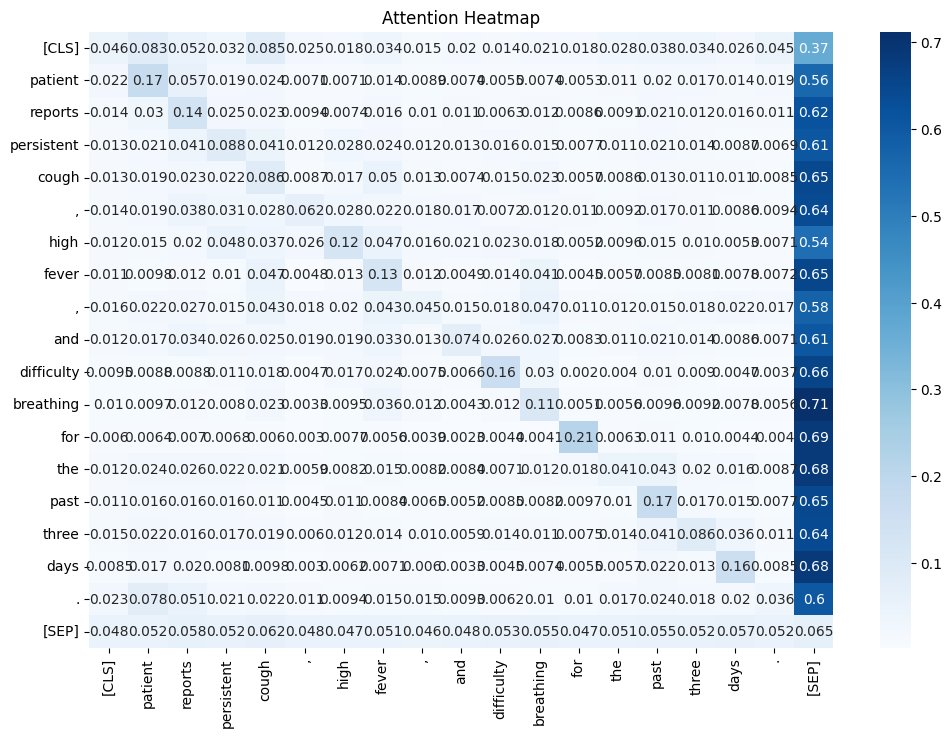

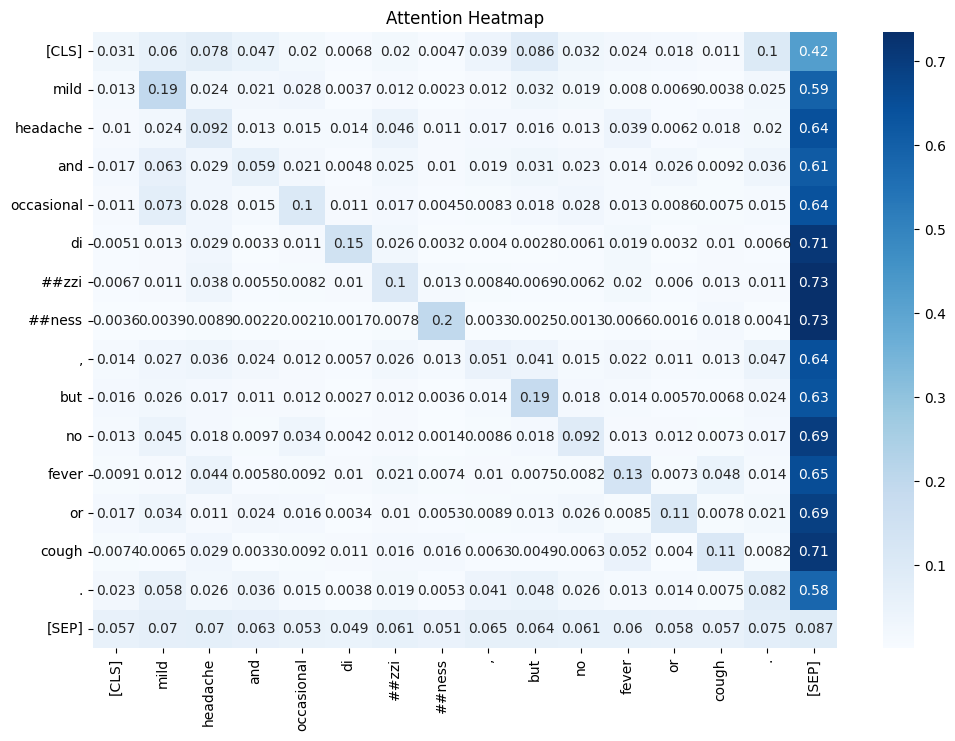

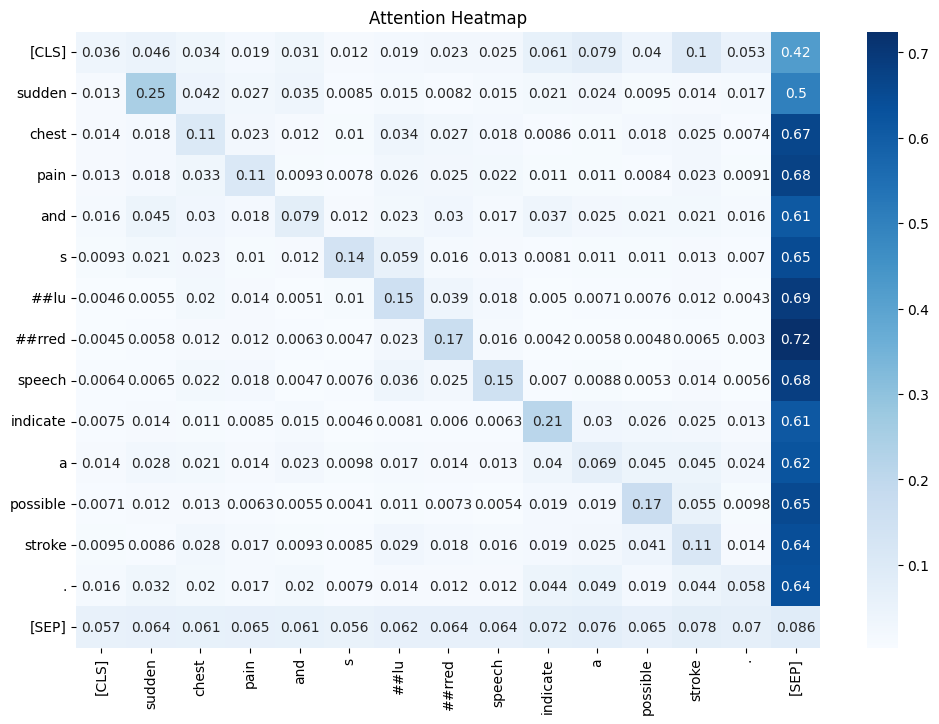

In [3]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoModel, AutoTokenizer

# Load Bio_ClinicalBERT model and tokenizer
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

def get_attention_map(text):
    """
    Function to get attention scores for each token in the input text.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)

    attentions = outputs.attentions  # Extract attention weights from the model

    # Select the last layer's attention scores
    last_layer_attention = attentions[-1].squeeze(0)  # Shape: (num_heads, seq_len, seq_len)

    # Compute mean attention across all heads
    mean_attention = last_layer_attention.mean(dim=0).numpy()  # Shape: (seq_len, seq_len)

    # Convert token IDs back to words
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze(0))

    return tokens, mean_attention

def plot_attention_heatmap(tokens, attention_matrix):
    """
    Function to visualize attention heatmap.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens, cmap="Blues", annot=True)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title("Attention Heatmap")
    plt.show()

# Example 1: Severe Symptoms
text1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
tokens1, attention_matrix1 = get_attention_map(text1)
plot_attention_heatmap(tokens1, attention_matrix1)

# Example 2: Mild Symptoms
text2 = "Mild headache and occasional dizziness, but no fever or cough."
tokens2, attention_matrix2 = get_attention_map(text2)
plot_attention_heatmap(tokens2, attention_matrix2)

# Example 3: Rare Critical Symptoms
text3 = "Sudden chest pain and slurred speech indicate a possible stroke."
tokens3, attention_matrix3 = get_attention_map(text3)
plot_attention_heatmap(tokens3, attention_matrix3)
